In [65]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import csv
import re
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [124]:
df2 = pd.read_csv('imdb_scraped.csv')

In [125]:
ratings_scraped = pd.read_csv('rating_scraped.csv')

In [128]:
df2

,genre,gross,id,mins,rating,score,title,year
0,Drama,$0.75M,tt0050783,110 min,8.1,110 min,Nights of Cabiria,(1957)
1,"Action, Adventure, Comedy",$389.81M,tt3896198,136 min,7.6,136 min,Guardians of the Galaxy Vol. 2,(2017)
2,"Action, Adventure, Sci-Fi",$936.66M,tt2488496,138 min,7.9,138 min,Star Wars: Episode VII - The Force Awakens,(2015)
3,"Action, Adventure, Sci-Fi",$154.06M,tt1392190,120 min,8.1,120 min,Mad Max: Fury Road,(2015)
4,"Crime, Drama, Thriller",$74.28M,tt0477348,122 min,8.1,122 min,No Country for Old Men,(2007)
...,...,...,...,...,...,...,...,...
245,"Crime, Drama",$5.32M,tt0087843,229 min,8.4,229 min,Once Upon a Time in America,(1984)
246,"Comedy, Drama",$6.53M,tt1187043,170 min,8.4,170 min,3 Idiots,(2009)
247,"Animation, Adventure, Fantasy",$2.38M,tt0119698,134 min,8.4,134 min,Princess Mononoke,(1997)
248,"Mystery, Romance, Thriller",$3.20M,tt0052357,128 min,8.3,128 min,Vertigo,(1958)


In [ ]:
# HISTOGRAM?

from plotly.graph_objs import Figure, Histogram, Layout
# df.sort_values(['gross'])
min_ = df['imdb_score'].min()
max_ = df['imdb_score'].max()

data = [Histogram(x=df['imdb_score'], 
                  xbins=dict(start=min_,
                             end=max_,
                             size=(max_-min_)/10))]
layout = Layout(title="Histogram of IMDB score",
                bargap=0.2)
fig = Figure(data=data, layout=layout)

plotly.offline.iplot(fig, show_link=False, image_width=600, image_height=400)

In [146]:
import plotly.express as px
# fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
df = pd.read_csv('imdb_scraped.csv')
df['gross'] = df['gross'].apply(lambda x: float(str(x).replace('$', '').replace('M', '')) * 10**6)
df = df.sort_values(['gross'])

fig = px.scatter(df,x= 'gross', y='genre', title='Gross vs Genre')
fig.show()


In [163]:
# template
import plotly.express as px
# fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
df = pd.read_csv('imdb_scraped.csv')
df['mins'] = df['mins'].apply(lambda x: int(str(x).replace(' min', '')))
df = df.sort_values(['mins'])
grouped_df = df.groupby('genre')['mins'].mean()
grouped_df = grouped_df.reset_index()
# grouped_df['genre'] = grouped_df.index
fig = px.scatter(grouped_df,x='mins', y='genre', title='Mins vs Genre')
fig.show()

In [170]:
# template
import plotly.express as px
# fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
df = pd.read_csv('imdb_scraped.csv')
df['mins'] = df['mins'].apply(lambda x: int(str(x).replace(' min', '')))
df['gross'] = df['gross'].apply(lambda x: float(str(x).replace('$', '').replace('M', '')) * 10**6)
df = df.sort_values(['mins'])
grouped_df = df.groupby('mins')['gross'].mean()
grouped_df = grouped_df.reset_index()
# grouped_df['genre'] = grouped_df.index
fig = px.scatter(grouped_df,x='mins', y='gross', title='Mins vs Gross')
fig.show()

In [169]:
import plotly.express as px
# fig = px.scatter(x=[0, 1, 2, 3, 4], y=[0, 1, 4, 9, 16])
df = pd.read_csv('imdb_scraped.csv')
df['mins'] = df['mins'].apply(lambda x: int(str(x).replace(' min', '')))
df['gross'] = df['gross'].apply(lambda x: float(str(x).replace('$', '').replace('M', '')) * 10**6)
df = df.sort_values(['mins'])
grouped_df = df.groupby('genre')['rating'].mean()
grouped_df = grouped_df.reset_index()
# grouped_df['genre'] = grouped_df.index
fig = px.bar(grouped_df,x='genre', y='rating', title='Rating vs Genre')
fig.show()

In [144]:
df['gross_num'] = df['gross'].apply(lambda x: float(str(x).replace('$', '').replace('M', '')) * 10**6)
# df['gross'] = pd.to_numeric(df['gross'])
df[['gross_num', 'gross']]

,gross_num,gross
38,10000.0,$0.01M
96,10000.0,$0.01M
143,10000.0,$0.01M
184,20000.0,$0.02M
109,20000.0,$0.02M
...,...,...
225,NaN,NaN
228,NaN,NaN
229,NaN,NaN
231,NaN,NaN


In [ ]:
# a genre and gross chart

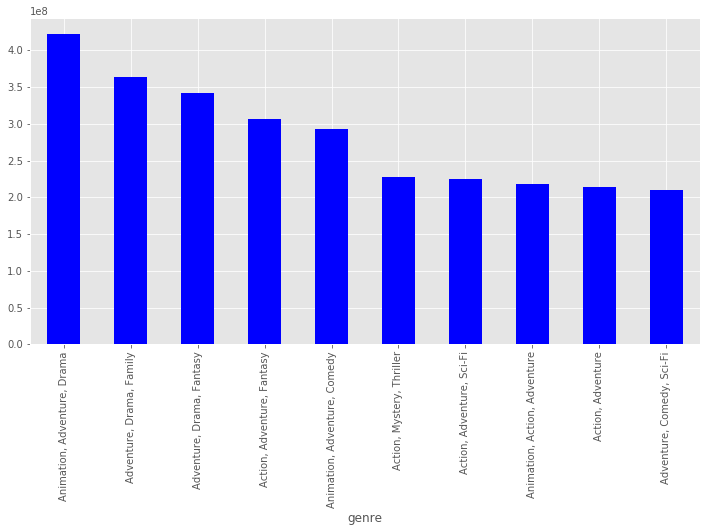

In [171]:
plt.figure(figsize=(12,6))
df.groupby('genre')['gross'].median().sort_values(ascending=False).head(10).plot.bar(color='b')

In [29]:
years = []
grosses = []

with open('imdb_scraped.csv', newline='') as csvfile:
    moviereader = csv.reader(csvfile, delimiter=',', quotechar='\"')
    for movie in moviereader:
        #print(movie)
        if len(movie) < 2:
            continue
        gross = movie[1]
        year = movie[-1]
        year = re.findall('\d\d\d\d', year)
        if year:
            year = int(year[0])
            if gross:
                gross_number = float(gross[1:][:-1]) * (10 * 10 * 10 * 10 * 10 * 10)
                years.append(year)
                grosses.append(gross_number)
                #print(f"Year: {year}, gross: {gross_number}")
fig = go.Figure(data=go.Bar(y=grosses, x=years))
fig.update_layout(
    title="Movie Gross Over Time",
    xaxis_title="Years",
    yaxis_title="Gross",
)
fig.show()

In [ ]:
print(df)

In [32]:
years = []
ratings = []

with open('imdb_scraped.csv', newline='') as csvfile:
    moviereader = csv.reader(csvfile, delimiter=',', quotechar='\"')
    for movie in moviereader:
        #print(movie)
        if len(movie) < 2:
            continue
        rating = movie[4]
        year = movie[-1]
        year = re.findall('\d\d\d\d', year)
        if year:
            year = int(year[0])
            if rating:
                rating_number = float(rating)
                years.append(year)
                ratings.append(rating_number)
                #print(f"Year: {year}, gross: {gross_number}")
ratings = sorted(ratings)
years = sorted(years)
fig = go.Figure(data=go.Bar(y=ratings, x=years))
#fig.update_yaxes(type="category")
fig.update_layout(
    title="Movie Ratings Over Time",
    xaxis_title="Years",
    yaxis_title="Rating",
)
fig.show()

In [ ]:
# template for another analysis

In [ ]:
years = []
grosses = []

with open('imdb_scraped.csv', newline='') as csvfile:
    moviereader = csv.reader(csvfile, delimiter=',', quotechar='\"')
    for movie in moviereader:
        #print(movie)
        if len(movie) < 2:
            continue
        gross = movie[1]
        year = movie[-1]
        year = re.findall('\d\d\d\d', year)
        if year:
            year = int(year[0])
            if gross:
                gross_number = float(gross[1:][:-1]) * (10 * 10 * 10 * 10 * 10 * 10)
                years.append(year)
                grosses.append(gross_number)
                #print(f"Year: {year}, gross: {gross_number}")
fig = go.Figure(data=go.Bar(y=grosses, x=years))
fig.update_layout(
    title="Movie Gross Over Time",
    xaxis_title="Years",
    yaxis_title="Gross",
)
fig.show()

In [59]:
score_df = df[['gross', 'score']]